In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pydotplus
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler

集成学习 - 平均多个模型的准确率

- 单个模型的准确率要高，且‘好而不同’
- VotingClassifier
    - hard voting - class
    - soft voting - probability

In [3]:
data_df = pd.read_csv('../data/wine_quality.csv')
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data_df['level'] = data_df['quality'].apply(lambda x : 0 if x < 6 else 1)

In [6]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


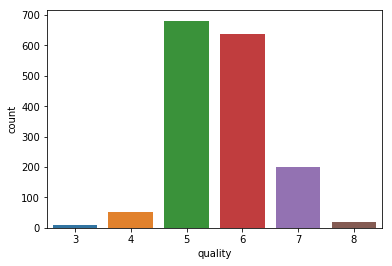

In [7]:
sns.countplot(x=data_df['quality'])

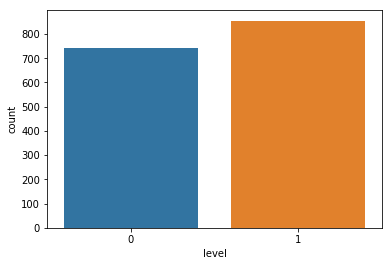

In [8]:
sns.countplot(x=data_df['level'])

In [10]:
FEAT_COLS = data_df.columns.tolist()[:-2]
X = data_df[FEAT_COLS].values
y = data_df['level'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=10)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
clf1 = DecisionTreeClassifier(max_depth=5)
clf2 = LogisticRegression(C=1)
clf3 = SVC(C=100, kernel='linear',probability=True)
clf4 = MLPClassifier(hidden_layer_sizes=(10, 100, 10), activation='relu')

if not ```SVC(C=100,, kernel='linear',probability=True)```, 

soft voting error
```AttributeError: predict_proba is not available when  probability=False```

In [42]:
clfs = [('DecisionTree',clf1),('LogisticRegression',clf2),('SVC',clf3),('MLPClassifier',clf4)]

In [43]:
for clf_tuple in clfs:
    model_name, model = clf_tuple
    model.fit(X_train_scaled,y_train)
    acc = model.score(X_test_scaled,y_test)
    print('{} -> accuracy: {:.2f}%'.format(model_name,acc*100))

DecisionTree -> accuracy: 72.61%
LogisticRegression -> accuracy: 74.11%
SVC -> accuracy: 74.11%
MLPClassifier -> accuracy: 73.73%


In [44]:
hard_clf = VotingClassifier(estimators=clfs,voting='hard')
hard_clf.fit(X_train_scaled,y_train)
hard_acc = hard_clf.score(X_test_scaled,y_test)
print('hard vothing acc: ',hard_acc)

hard vothing acc:  0.7410881801125704


In [45]:
soft_clf = VotingClassifier(estimators=clfs,voting='soft')
soft_clf.fit(X_train_scaled,y_train)
soft_acc = soft_clf.score(X_test_scaled,y_test)
print('soft vothing acc: ',soft_acc)

soft vothing acc:  0.7298311444652908


In [ ]:
```python

"""
    任务：红酒质量预测
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


DATA_FILE = './data/wine_quality.csv'


def main():
    """
        主函数
    """
    wine_data = pd.read_csv(DATA_FILE)
    # 处理数据
    wine_data.loc[wine_data['quality'] <= 5, 'quality'] = 0
    wine_data.loc[wine_data['quality'] >= 6, 'quality'] = 1
    all_cols = wine_data.columns.tolist()
    feat_cols = all_cols[:-1]

    # 11列红酒的属性作为样本特征
    X = wine_data[feat_cols].values
    # label列为样本标签
    y = wine_data['quality'].values

    # 将原始数据集拆分成训练集和测试集，测试集占总样本数的1/3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

    # 特征预处理
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 构建组件分类器
    clf1 = DecisionTreeClassifier(max_depth=10)
    clf2 = LogisticRegression(C=0.1)
    clf3 = SVC(kernel='linear', probability=True)

    clfs = [('决策树', clf1), ('逻辑回归', clf2), ('支持向量机', clf3)]

    for clf_tup in clfs:
        clf_name, clf = clf_tup
        clf.fit(X_train_scaled, y_train)
        acc = clf.score(X_test_scaled, y_test)
        print('模型：{}, 准确率:{:.2f}%'.format(clf_name, acc * 100))

    # hard voting
    hard_clf = VotingClassifier(estimators=clfs, voting='hard')
    hard_clf.fit(X_train_scaled, y_train)
    print('hard voting: {:.2f}%'.format(hard_clf.score(X_test_scaled, y_test) * 100))

    # soft voting
    soft_clf = VotingClassifier(estimators=clfs, voting='soft')
    soft_clf.fit(X_train_scaled, y_train)
    print('soft voting: {:.2f}%'.format(soft_clf.score(X_test_scaled, y_test) * 100))


if __name__ == '__main__':
    main()
```